## Importovanie potrebných knižníc

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np
from metrics import accuracy, f1_score, precision, recall
from svm import SVM
from svm_visualization import visualize_svm

## Vygenerovanie syntetických dát

In [2]:
X, y = datasets.make_blobs(n_samples=57, n_features=2, centers=2, cluster_std=1.05, random_state=57)

## Zmena označení cieľových tried na -1 a 1

In [3]:
y = np.where(y == 0, -1, 1)

## Rozdelenie dát na trénovaciu množinu a dočasnú množinu (kombinácia validačnej a testovacej množiny)

In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=9)

## Rozdelenie dočasnej množiny na validačnú a testovaciu množinu

In [5]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12)

## Inicializácia SVM modelu

In [6]:
model = SVM(max_iter=100000, verbose=True)


## Trénovanie modelu a získanie podporných vektorov

In [7]:
support_vectors = model.fit(X_train, y_train, X_val, y_val)

Iterácia 1: vahy = [-0.0001      0.01367482  0.00334142], náklad = 1.05991869, Správnosť = 50.00%
Iterácia 11: vahy = [-0.0048      0.11642443  0.01580322], náklad = 1.43789109, Správnosť = 50.00%
Iterácia 21: vahy = [-0.0179      0.14557041 -0.01946316], náklad = 1.37169609, Správnosť = 50.00%
Iterácia 31: vahy = [-0.0315      0.1714494  -0.05382383], náklad = 1.32844204, Správnosť = 50.00%
Iterácia 41: vahy = [-0.0451      0.19751198 -0.08721785], náklad = 1.30895978, Správnosť = 66.67%
Iterácia 51: vahy = [-0.059       0.22240176 -0.11968053], náklad = 1.30256247, Správnosť = 66.67%
Iterácia 61: vahy = [-0.073       0.247463   -0.15069701], náklad = 1.29900321, Správnosť = 83.33%
Iterácia 71: vahy = [-0.0871      0.27211443 -0.18147673], náklad = 1.29470578, Správnosť = 83.33%
Iterácia 81: vahy = [-0.1015      0.29467036 -0.21359658], náklad = 1.28243600, Správnosť = 83.33%
Iterácia 91: vahy = [-0.1142      0.31542777 -0.23854429], náklad = 1.27966672, Správnosť = 83.33%
Iterácia 10

# Predikcia na testovacej množine

In [8]:
y_pred = model.forward(X_test)

## Výpočet metrík

In [9]:
print(f"Správnosť: {accuracy(y_test, y_pred):.2%}")
print(f"Presnosť: {precision(y_test, y_pred):.2%}")
print(f"Recall: {recall(y_test, y_pred):.2%}")
print(f"F1: {f1_score(y_test, y_pred):.2%}")

Správnosť: 100.00%
Presnosť: 100.00%
Recall: 100.00%
F1: 100.00%


## Vizualizácia rozhodovacej hranice SVM modelu


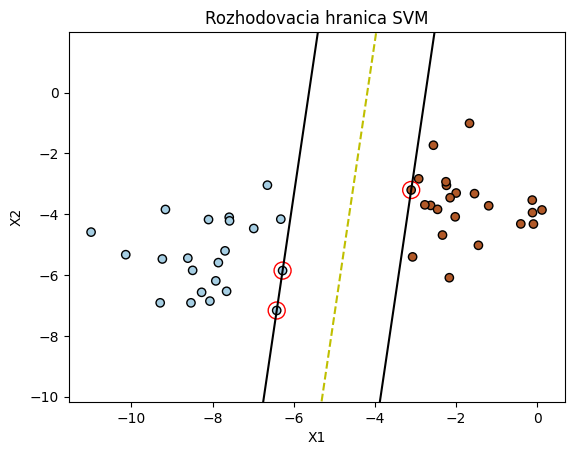

In [10]:
visualize_svm(X_train, y_train, model.w, support_vectors)